# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

### 예제

##### import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [2]:
X, y = make_regression(n_samples=100,    # 데이터포인트(샘플)개수
                       n_features=1,     # feature 개수
                       n_informative=1,  # 정답(y)에 영향을 주는 feature 개수
                       noise = 50,       # 잡음 - 예측(추론)할 수 없는 절대 오차
                       coef = False,     # feature간의 상관성(연관성) 여부
                       random_state = 1) 

In [3]:
X.shape, y.shape

((100, 1), (100,))

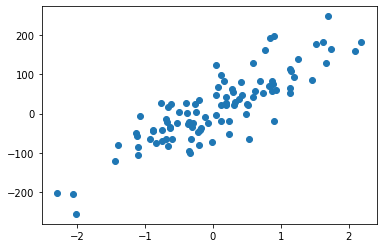

In [4]:
plt.scatter(X, y)

In [5]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(15.293427290684107,
 -255.11169199137663,
 247.19463389209255,
 20.62597485010551)

##### 모델 생성, 학습, 추론

In [6]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

# y: 정답, pred: y_hat

##### 평가

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse))
print('R^2 : ', r2)

MSE :  2078.5472792307764
RMSE :  45.59108771712709
R^2 :  0.7321024057172182


- 해석 : 73% 의 개선이 있음

##### 교차검증 (cross validation)

In [8]:
score = cross_val_score(lr, X, y, cv=5)   # 기본 평가지표: R2
print("cv별 R2:", score)
print("평균 R2: ", np.mean(score))

cv별 R2: [0.58124097 0.82853824 0.52826294 0.76611492 0.7184243 ]
평균 R2:  0.6845162761863837


In [9]:
score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
# neg_mean_squared_error : MSE * -1값을 평가지표로 출력
print("mse: ", score) # MSE값을 보려면 -1값을 다시 곱해줘야 한다.
print("mse평균: ", np.mean(score)*-1)

mse:  [-2345.81697166 -1813.79924962 -2204.02751713 -1490.54918087
 -3044.11453168]
mse평균:  2179.661490191461


##### 모델이 계수(coef)와 절편(intercept) 조회
- LinearRegression 모델이 학습해서 찾는 파라미터
    - coef_: Feature에 곱하는 가중치
    - intercept_: 모든 Feature가 0일때 예측값

In [10]:
lr.fit(X, y)
print("coef:", lr.coef_, "intercept:",lr.intercept_)

coef: [85.14546889] intercept: 10.135071944054275


##### X, y와 추론결과  시각화

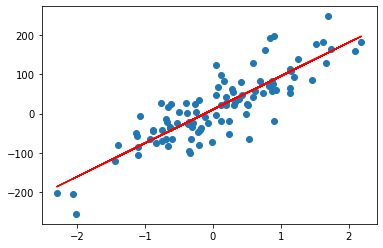

In [11]:
plt.scatter(X, y)
y_hat = X*lr.coef_ + lr.intercept_
plt.plot(X, y_hat, color='red')
plt.show()

## 기존 분류 모델의 회귀 모델

##### import

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

##### 모델들 생성

In [13]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=5)
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=2)
gb_reg = GradientBoostingRegressor(n_estimators=200, max_depth=1)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('decision tree',tree_reg), ('random forest',rf_reg), ('Gradient Boosting', gb_reg), ('linear reg',lr_reg)]

##### 평가출력 함수

In [14]:
%%writefile util.py
# %%writefile 파일경로 - cell의 내용을 파일로 저장한다. 반드시 첫줄에 작성한다.

import numpy as np
from sklearn.metrics import (accuracy_score, recall_score,
                             precision_score, f1_score,
                            mean_squared_error, r2_score)

def print_metrics(y, pred, title=None):
    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)   
    
    if title:
        print(title)
    print(f'정확도: {acc}, recall: {recall}, Precision: {precision}, f1점수: {f1}')

    
def print_regression_metrics(y, y_pred, title=None):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse}, R Square:{r2}")

Overwriting util.py


In [15]:
#from util import print_regression_metrics as print_metrics
from sklearn.metrics import accuracy_score


##### 모델 학습 및 평가

In [16]:
def print_metrics(y, y_pred, title=None):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse}, R Square:{r2}")

In [17]:
for name, model in estimators:   # (이름, 객체)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print_metrics(y_train, pred_train, name+" - Train")
    print_metrics(y_test, pred_test, name+" - Test")
    print("-------------------------------------------")

knn - Train
MSE:1427.767659021123, RMSE:37.785812933178015, R Square:0.8019417941941395
knn - Test
MSE:2864.855454376287, RMSE:53.52434450207015, R Square:0.6640766473771966
-------------------------------------------
decision tree - Train
MSE:817.4625116301221, RMSE:28.59130132802846, R Square:0.8866025873719422
decision tree - Test
MSE:3301.0727964279786, RMSE:57.45496320099751, R Square:0.6129272632816158
-------------------------------------------
random forest - Train
MSE:1697.1982640560145, RMSE:41.19706620690379, R Square:0.7645667059679615
random forest - Test
MSE:2914.78652868193, RMSE:53.988762985291025, R Square:0.6582218968852693
-------------------------------------------
Gradient Boosting - Train
MSE:1378.1570809707919, RMSE:37.123538098769515, R Square:0.8088237136826204
Gradient Boosting - Test
MSE:2399.250662740208, RMSE:48.98214636722454, R Square:0.7186719053559923
-------------------------------------------
linear reg - Train
MSE:2017.1792010802012, RMSE:44.91301816

##### Voting
- VotingRegressor 
    - 각 모델이 예측한 값의 평균을 반환한다.

In [18]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=2)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=2)
gb_reg = GradientBoostingRegressor(n_estimators=200, max_depth=1)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('random forest',rf_reg), ('Gradient Boosting', gb_reg), ('linear reg',lr_reg)]

vote_reg = VotingRegressor(estimators)
vote_reg.fit(X_train, y_train)
pred_train = vote_reg.predict(X_train)
pred_test = vote_reg.predict(X_test)

In [19]:
print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

MSE:1507.825200909263, RMSE:38.83072495987247, R Square:0.7908363086430356
MSE:2432.437469451874, RMSE:49.31974725656929, R Square:0.7147805315847964


##### DecisionTreeRegressor Tree 시각화

In [21]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [22]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

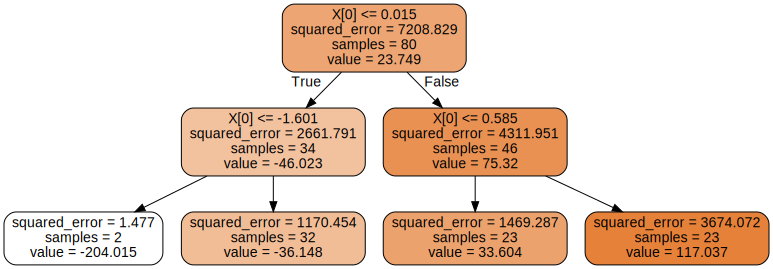

In [23]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(tree_reg, 
                               out_file=None,
                               rounded=True, filled=True))
display(SVG(graph.pipe(format='svg')))